# Transformers

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import logging

tf.get_logger().setLevel(logging.ERROR)

## Import IMDB Dataset

In [2]:
VOCAB_SIZE = 10000
MAX_LEN = 128

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=VOCAB_SIZE)
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=MAX_LEN)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=MAX_LEN)

In [3]:
print(f'X_train: {X_train.shape}')
print(f'Y_train: {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'Y_test : {y_test.shape}')

X_train: (25000, 128)
Y_train: (25000,)
X_test : (25000, 128)
Y_test : (25000,)


## Attention Model

In [4]:
inputs = tf.keras.layers.Input((MAX_LEN,))
embedding_output = tf.keras.layers.Embedding(VOCAB_SIZE, 128)(inputs)
attention_output = tf.keras.layers.MultiHeadAttention(num_heads=8, key_dim=16)(embedding_output, embedding_output)
pooling_output = tf.keras.layers.GlobalAveragePooling1D()(attention_output)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(pooling_output)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name='Attention')

model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

Model: "Attention"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 128, 128)  │  1,280,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 128, 128)  │     66,048 │ embedding[0][0],  │
│ (MultiHeadAttentio… │                   │            │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ multi_head_atten… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │        129 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,346,177 (5.14 MB)

 Trainable params: 1,346,177 (5.14 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
BATCH_SIZE = 128
EPOCHS = 10

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 127ms/step - accuracy: 0.6768 - loss: 0.5544
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 127ms/step - accuracy: 0.8989 - loss: 0.2531
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 126ms/step - accuracy: 0.9207 - loss: 0.2004
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 129ms/step - accuracy: 0.9356 - loss: 0.1681
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 130ms/step - accuracy: 0.9491 - loss: 0.1468
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 130ms/step - accuracy: 0.9572 - loss: 0.1238
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 121ms/step - accuracy: 0.9636 - loss: 0.1077
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.9660 - loss: 0.0883
Epoch 9/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.9763 - loss: 0.0690
Epoch 10/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 127ms/step - accuracy: 0.9811 - loss: 0.0532


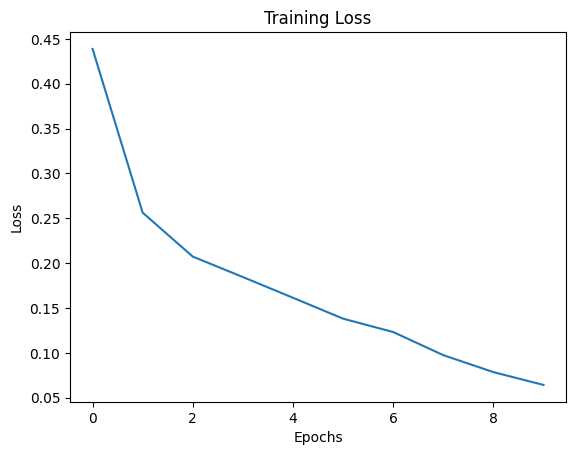

In [6]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Performance on test set:')
print(f'Loss: {test_loss}\nAccuracy: {test_accuracy}')

Performance on test set:
Loss: 0.8938530683517456
Accuracy: 0.8173199892044067
